# Исследования о поездах пользователей на самокатах

Предоставлен набор данных о пользователях, информации о них, их поездки, варианты подписок. 

*Цель* исследования: 
1. Построить различные гипотезы, дать советы бизнесу.

*Ход* исследования: 
1. Выгрузить полученные данные. 
2. Проанализировать данные, проверить на дубликаты, пропуски. 
3. Провести исследовательский анализ, проверить аномалии. 
4. объеденить данные, сделать сводную таблицу.
5. Совершить подсчет выручки.
6. Сформировать необходимые гипотезы, првоерить. 
7. Сделать выводы.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st

# Шаг 1. Загрузка данных

In [2]:
users = pd.read_csv(r"C:\Users\nssavinov\Desktop\Пректы практикум\4 Статистический анализ\users_go.csv")
rides = pd.read_csv(r"C:\Users\nssavinov\Desktop\Пректы практикум\4 Статистический анализ\rides_go.csv")
subscriptions = pd.read_csv(r"C:\Users\nssavinov\Desktop\Пректы практикум\4 Статистический анализ\subscriptions_go.csv")

Выгрузим первые 5 строк и инфо каждого датафрейма

In [3]:
def displ(table):
    display(table.head())
    display(' ')
    display(table.info())

In [4]:
displ (users)
displ (rides)
displ (subscriptions)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


' '

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


' '

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


' '

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


None

***В результате данного отображаения, необходимо сделать в следующем пункте*** 

Таблица users: 

- Проверить  на явные дубликаты
- Проверить города на неявные дубликаты
- Пустых значений нет 

Таблица rides:

- Округлить дистанцию и длительность до 1-2 знаков после запятой (такая точность не нужна) 
- Привести дату к формату даты 
- Создайте новый столбец с номером месяца на основе столбца date.
- Пропусков нет 

Таблица Subscriptions 

- It's okey

# Шаг 2. Предобработка данных

**Таблица users:** 

- Проверить  на явные дубликаты
- Проверить города на неявные дубликаты
- Пустых значений нет 

In [5]:
users.duplicated().sum()

31

Обнаруженно, что явных дубликатов 31! Избавимся от них

In [6]:
users = users.drop_duplicates()
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


Явные дубликаты из данной таблицы были удалены (которых явно не должно было быть), проверим на неявные дубликаты в городах, вдруг кто-то внес Москва, а кто-то москва. 

In [7]:
list (users['city'].sort_values(ascending = False).unique())

['Тюмень',
 'Сочи',
 'Ростов-на-Дону',
 'Пятигорск',
 'Омск',
 'Москва',
 'Краснодар',
 'Екатеринбург']

**Таблица rides:**

- Округлить дистанцию и длительность до 1-2 знаков после запятой (такая точность не нужна) 
- Привести дату к формату даты 
- Создайте новый столбец с номером месяца на основе столбца date.
- Пропусков нет 

In [8]:
rides['distance'] = rides['distance'].round(1) #Округление до 1 знака после запятой, т.к. это все измеряется в метрах,
# т.е. не так важна размерность в 10 сантиметрах
# каждое значение из столбца duration округляется с помощью «потолка»: 
rides['duration'] = np.ceil(rides['duration']) 

rides ['date'] = pd.to_datetime(rides ['date'] , format = '%Y-%m-%d' )

In [9]:
display (rides ['date'].min())
display (rides ['date'].max())

Timestamp('2021-01-01 00:00:00')

Timestamp('2021-12-30 00:00:00')

**Проверенно** что данные лежат на годовом интервале => что не будет такой ситуации "разные года то январь 2021 и январь 2022 будут под одной цифрой (1)"

Были округлены значения и приведена дата в соответствие, далее: 
- Создайте новый столбец с номером месяца на основе столбца date.

In [10]:
rides ['month'] = rides ['date'].dt.month

Проверим дубликаты: 

In [11]:
rides.duplicated().sum()

0

In [12]:
displ (rides)

,user_id,distance,duration,date,month
0,1,4409.9,26.0,2021-01-01,1
1,1,2617.6,16.0,2021-01-18,1
2,1,754.2,7.0,2021-04-20,4
3,1,2694.8,19.0,2021-08-11,8
4,1,4028.7,27.0,2021-08-28,8


' '

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 635.3 KB


None

В результате данного шага было: 
Таблица users: 

- Проверены  на явные дубликаты
- Проверены города на неявные дубликаты

Таблица rides:

- Округлена  дистанция и длительность поезди до 1-2 знаков после запятой (такая точность не нужна) 
- Приведена дата к формату даты 
- Создан новый столбец с номером месяца на основе столбца date.
- Проверены дубликаты

# Шаг 3. Исследовательский анализ данных

В рузультате 3 шага необходимо выполнить следующие действия.
Опишите и визуализируйте общую информацию о пользователях и поездках:

3.1 частота встречаемости городов;

3.2 соотношение пользователей с подпиской и без подписки;

3.3 возраст пользователей;

3.4 расстояние, которое пользователь преодолел за одну поездку;

3.5 продолжительность поездок.


## Частота встречаемости городов

<Axes: title={'center': 'Кол-во пользователей в городах'}, xlabel='city'>

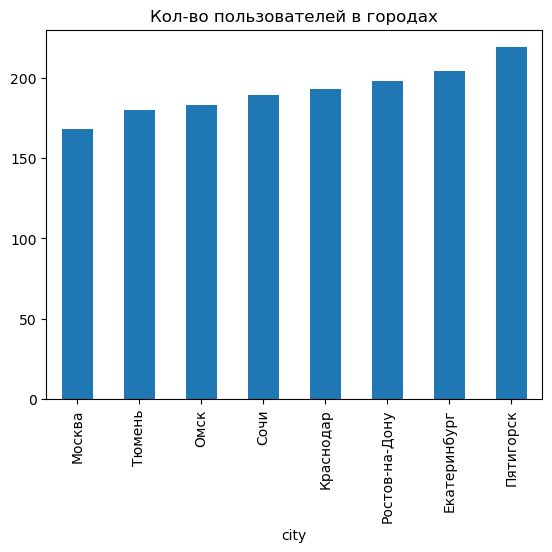

In [13]:
((users
    .groupby('city')['city'].count().sort_values())
    .plot(title = 'Кол-во пользователей в городах' , kind = 'bar' ))

Больше всего пользователей зарегестрированно в Пятигорске, меньше всего в Москве 

## соотношение пользователей с подпиской и без подписки;

In [14]:
(users
    .groupby('subscription_type')
    ['subscription_type'].count())

subscription_type
free     835
ultra    699
Name: subscription_type, dtype: int64

Количество пользователей с подпиской на 136 меньше. хочется провести анализ по городам:

In [15]:
users_1 = (users
    .pivot_table(index = 'city', columns = 'subscription_type', values = 'user_id', aggfunc = 'count'))
users_1 ['u/f'] = (users_1['ultra'] / (users_1['ultra'] + users_1['free']) *100).round (2)
users_1.sort_values(by = 'u/f' , ascending = False)

subscription_type,free,ultra,u/f
city,,,
Москва,84,84,50.00
Омск,92,91,49.73
Тюмень,98,82,45.56
Сочи,103,86,45.50
Екатеринбург,112,92,45.10
Ростов-на-Дону,109,89,44.95
Пятигорск,125,94,42.92
Краснодар,112,81,41.97


В Москве кол-во пользователей с подпиской в процентном соотношении больше всего, причина: возможно доход, а также дешевле ездить таким способом, необходимо оценить расстояния 

*Посчитаем: соотношение категорий пользователей в процентах или в долях от целого*

In [16]:
display ('Cоотношение категорий пользователей в процентах или в долях от целого:',
        (users[users['subscription_type'] == 'ultra']['user_id'].count()
        / users['user_id'].count() * 100).round (2))

'Cоотношение категорий пользователей в процентах или в долях от целого:'

45.57

<Axes: title={'center': 'Распределение подписок'}, ylabel='subscription_type'>

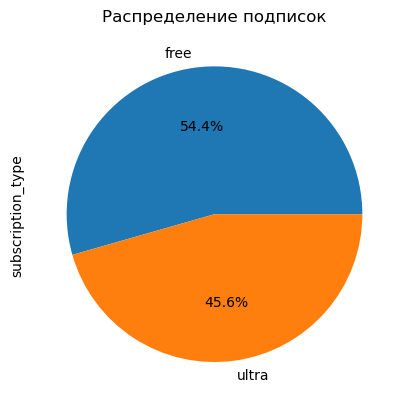

In [17]:
(users
    .groupby('subscription_type')
    ['subscription_type'].count()
    .plot (kind = 'pie', title = 'Распределение подписок', autopct='%1.1f%%'))

Пользователей с подпиской от общего объёма: **45,6%**

##  возраст пользователей;

24.903520208604956

<Axes: title={'center': 'Распределение людей по возрасту'}, ylabel='Frequency'>

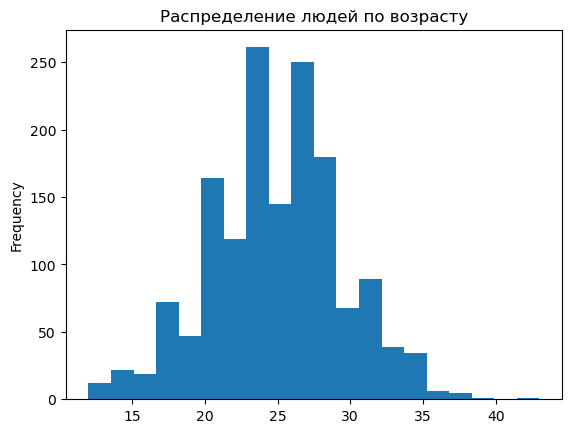

In [18]:
display (users['age'].mean())
users['age'].plot (kind = 'hist', title = 'Распределение людей по возрасту', bins = 20)

Основная возрастная группа от 20 до 28 лет. 

## расстояние, которое пользователь преодолел за одну поездку;

count    18068.000000
mean      3070.659841
std       1116.831106
min          0.900000
25%       2543.200000
50%       3133.600000
75%       3776.225000
max       7211.000000
Name: distance, dtype: float64

<Axes: title={'center': 'Дистанция поездок'}, ylabel='Frequency'>

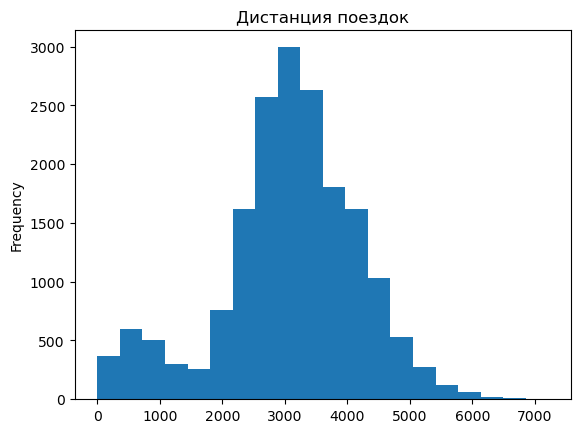

In [19]:
display (rides['distance'].describe())
rides['distance'].plot (kind = 'hist', bins = 20, title = 'Дистанция поездок')

Больше всего поезки совершаются около 3к метров. 

<Axes: >

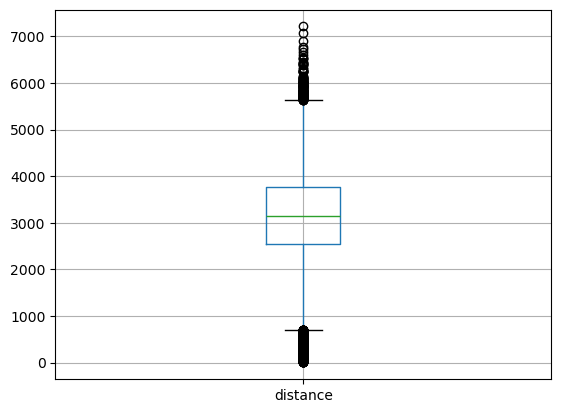

In [20]:
rides.boxplot('distance')

**Вывод** 

При построении гистограммы видно что имеются 2 локальных пика, возможно это обоснованно тем что люди берут самокаты для быстрых поездок и длинных, необходимо проверить

Проверенно было построением диаграммы размаха, которая определила, что значения <750 и >5500 метров, являются аномалиями. 
Сделаем проверку и в отдельности посмотрим на эти данные
Минимальное значение = 0 
Максимальное значение = 7211

In [21]:
(rides[rides['distance'] < 750]
    .sort_values (by = 'distance')
)

,user_id,distance,duration,date,month
11555,1069,0.9,11.0,2021-01-31,1
9541,925,2.6,4.0,2021-10-19,10
13690,1223,4.3,5.0,2021-05-22,5
8658,861,6.8,7.0,2021-07-21,7
7841,796,7.1,11.0,2021-11-26,11
...,...,...,...,...,...
9555,926,745.8,7.0,2021-08-15,8
5693,608,747.1,8.0,2021-11-13,11
15061,1320,748.2,11.0,2021-04-03,4
7239,751,748.3,13.0,2021-09-15,9


Видно, что поездки длиной 750 имеют право на существование, а вот поездки от 0 до 100 метров, выглядят сомнительно. Посчитаем их кол-во: 

In [22]:
len (rides[rides['distance'] < 100])

78

Избавимся от них и проверим

In [23]:
rides = rides.drop (rides[rides['distance'] < 100].index).reset_index(drop=True)
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17990 entries, 0 to 17989
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   17990 non-null  int64         
 1   distance  17990 non-null  float64       
 2   duration  17990 non-null  float64       
 3   date      17990 non-null  datetime64[ns]
 4   month     17990 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 632.6 KB


Проверим аномалии >5,5 км

In [24]:
(rides[rides['distance'] > 5500]
    .sort_values (by = 'distance')
)

,user_id,distance,duration,date,month
15876,1385,5502.5,24.0,2021-07-31,7
7568,777,5503.9,27.0,2021-07-18,7
9173,900,5504.6,28.0,2021-05-01,5
15752,1378,5505.4,1.0,2021-08-04,8
9086,894,5508.0,14.0,2021-11-30,11
...,...,...,...,...,...
17169,1477,6724.9,1.0,2021-01-12,1
17099,1471,6760.9,33.0,2021-08-03,8
15517,1361,6908.5,24.0,2021-03-27,3
16413,1422,7066.0,24.0,2021-02-12,2


Данные значения тоже имеют право на существание, но необходимо чтобы была некоторая зависимость с длительностью поездки, т.к. невозможно преодолеть расстояние в 6 км на самокате за 1 мин.

Примем что максимальная скорость самоката 30 км

In [25]:
len (rides[rides['distance'] / 30000 *60 > rides['duration']])

95

Посчитано что если 95 значений в таблице являются аномильными значениями, избавимся от них.

In [26]:
rides = rides.drop (rides[rides['distance'] / 30000 *60 > rides['duration']].index).reset_index(drop=True)
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17895 entries, 0 to 17894
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   17895 non-null  int64         
 1   distance  17895 non-null  float64       
 2   duration  17895 non-null  float64       
 3   date      17895 non-null  datetime64[ns]
 4   month     17895 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 629.2 KB


**Вывод** 

Избавились от аномалий в выборке. Остальные значения принимаются как корректные и возможные. 

## продолжительность поездок.

count    17895.000000
mean        18.438502
std          5.951069
min          3.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

<Axes: title={'center': 'Длительность поездок'}, ylabel='Frequency'>

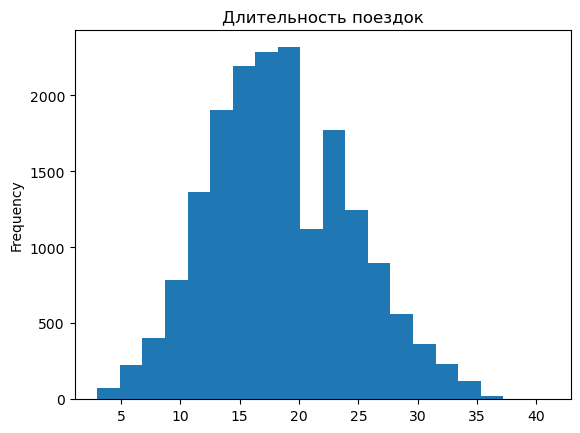

In [27]:
display (rides['duration'].describe())
rides['duration']. plot (kind = 'hist', bins = 20, title = 'Длительность поездок')

Основная длительность поездок от 10 до 25 минут

<Axes: >

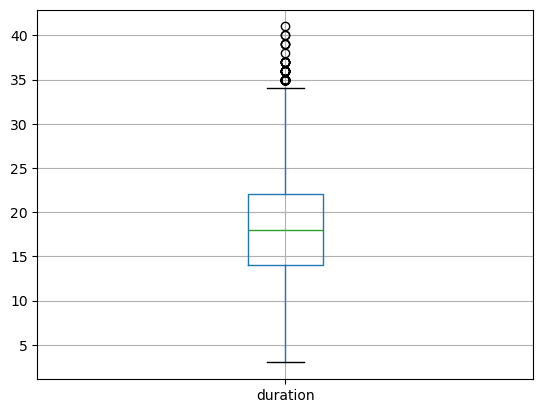

In [28]:
rides.boxplot('duration')

Оценим данные аномалии: 

Где длительность >= 35 минут

In [29]:
rides[rides['duration'] >= 35]

,user_id,distance,duration,date,month
42,4,4649.5,36.0,2021-08-14,8
143,15,4187.6,39.0,2021-01-13,1
499,55,4151.1,37.0,2021-06-30,6
524,58,4763.9,36.0,2021-02-17,2
854,91,4444.6,36.0,2021-11-05,11
...,...,...,...,...,...
16956,1468,4744.9,35.0,2021-06-13,6
17071,1476,4217.9,35.0,2021-04-13,4
17187,1485,3807.4,35.0,2021-12-09,12
17514,1509,3728.9,35.0,2021-01-22,1


Т.к. в предыдущем пункте были удалены аномалии с некорректной дистанцией и временем, считаем что данные аномали не являются аномалиями. 

**В результате анализа было проведено следующее:**

Описана и визуализированна общая информация о пользователях и поездках:

3.1 частота встречаемости городов;

3.2 соотношение пользователей с подпиской и без подписки;

3.3 возраст пользователей;

3.4 расстояние, которое пользователь преодолел за одну поездку;

3.5 продолжительность поездок.

# Шаг 4. Объединение данных

Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

In [30]:
display (users.info())
display (rides.info())
display (subscriptions.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17895 entries, 0 to 17894
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   17895 non-null  int64         
 1   distance  17895 non-null  float64       
 2   duration  17895 non-null  float64       
 3   date      17895 non-null  datetime64[ns]
 4   month     17895 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 629.2 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


None

Размеры датасета до объединения: 
1534, 17895, 2
т.к. у нас должна каждая поездка быть уникальной, то итоговый датасет должен = **17895**

In [31]:
dataframe = users.merge (rides, on = 'user_id')
dataframe = dataframe.merge (subscriptions, on = 'subscription_type')
dataframe["n_records"] = 1 #введем дополнительный столбец для подсчета кол-ва поездок, пункт 5
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17895 entries, 0 to 17894
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17895 non-null  int64         
 1   name               17895 non-null  object        
 2   age                17895 non-null  int64         
 3   city               17895 non-null  object        
 4   subscription_type  17895 non-null  object        
 5   distance           17895 non-null  float64       
 6   duration           17895 non-null  float64       
 7   date               17895 non-null  datetime64[ns]
 8   month              17895 non-null  int32         
 9   minute_price       17895 non-null  int64         
 10  start_ride_price   17895 non-null  int64         
 11  subscription_fee   17895 non-null  int64         
 12  n_records          17895 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(6), object(

Сделана 1 общая таблица, размером **17895**

Создайте ещё два датафрейма из датафрейма, созданного на этапе ранее: 
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [32]:
dataframe_ultra = dataframe[ dataframe['subscription_type'] == 'ultra'].reset_index(drop=True)
dataframe_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee,n_records
0,1,Кира,22,Тюмень,ultra,4409.9,26.0,2021-01-01,1,6,0,199,1
1,1,Кира,22,Тюмень,ultra,2617.6,16.0,2021-01-18,1,6,0,199,1
2,1,Кира,22,Тюмень,ultra,754.2,7.0,2021-04-20,4,6,0,199,1
3,1,Кира,22,Тюмень,ultra,2694.8,19.0,2021-08-11,8,6,0,199,1
4,1,Кира,22,Тюмень,ultra,4028.7,27.0,2021-08-28,8,6,0,199,1


In [33]:
dataframe_free = dataframe[ dataframe['subscription_type'] == 'free'].reset_index(drop=True)
dataframe_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee,n_records
0,700,Айдар,22,Омск,free,2515.7,15.0,2021-01-02,1,8,50,0,1
1,700,Айдар,22,Омск,free,846.9,17.0,2021-02-01,2,8,50,0,1
2,700,Айдар,22,Омск,free,4004.4,21.0,2021-02-04,2,8,50,0,1
3,700,Айдар,22,Омск,free,1205.9,10.0,2021-02-10,2,8,50,0,1
4,700,Айдар,22,Омск,free,3047.4,18.0,2021-02-14,2,8,50,0,1


Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

count    6500.000000
mean     3115.444985
std       836.895127
min       244.200000
25%      2785.400000
50%      3148.600000
75%      3560.600000
max      5699.800000
Name: distance, dtype: float64

<Axes: title={'center': 'Распределение дистанций пользователей с подпиской'}, ylabel='Frequency'>

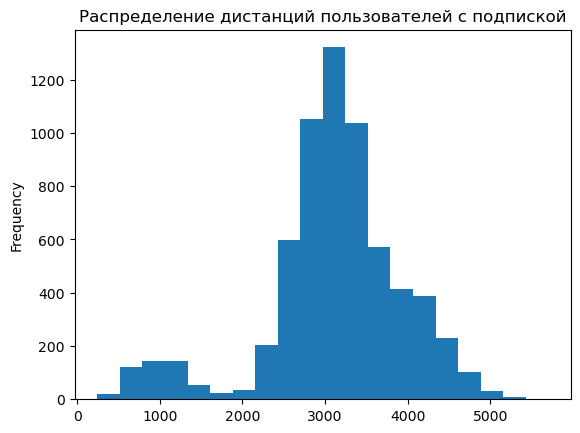

In [34]:
display (dataframe_ultra ['distance'].describe())
display(dataframe_ultra ['distance'].plot(kind = 'hist', bins = 20, title = 'Распределение дистанций пользователей с подпиской'))

count    11395.000000
mean      3048.710856
std       1214.976735
min        102.300000
25%       2374.300000
50%       3111.700000
75%       3890.650000
max       7066.000000
Name: distance, dtype: float64

<Axes: title={'center': 'Распределение дистанций пользователей без подписки'}, ylabel='Frequency'>

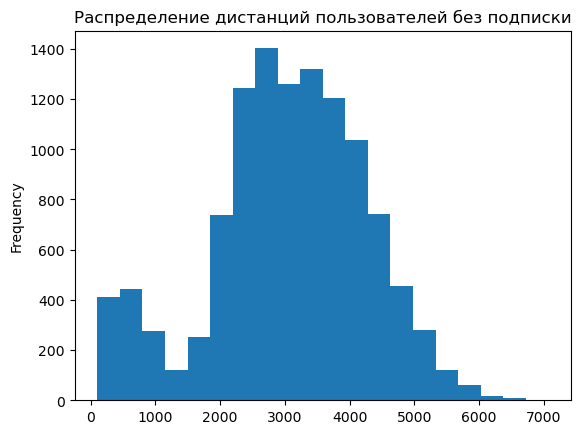

In [35]:
display (dataframe_free ['distance'].describe())
display(dataframe_free ['distance'].plot(kind = 'hist', bins = 20, title ='Распределение дистанций пользователей без подписки'))

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

<Axes: title={'center': 'Распределение длительности прездки с подпиской'}, ylabel='Frequency'>

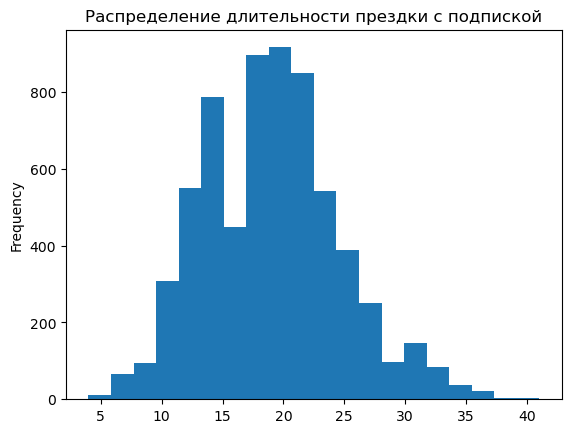

In [36]:
display (dataframe_ultra ['duration'].describe())
display (dataframe_ultra ['duration'].plot(kind = 'hist', bins = 20, title = 'Распределение длительности прездки с подпиской'))

count    11395.000000
mean        18.096709
std          6.128097
min          3.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

<Axes: title={'center': 'Распределение длительности без подписки'}, ylabel='Frequency'>

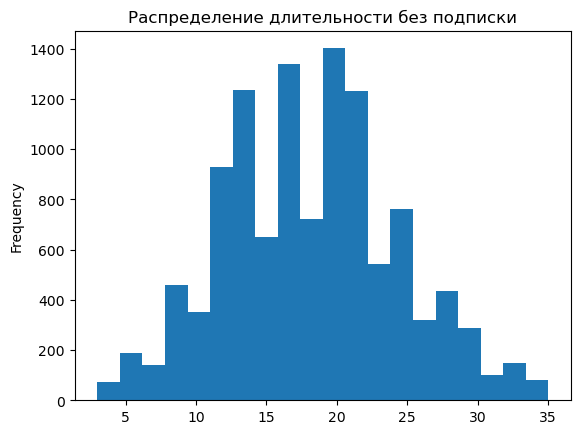

In [37]:
display (dataframe_free ['duration'].describe())
display (dataframe_free ['duration'].plot(kind = 'hist', bins = 20, title = 'Распределение длительности без подписки'))

**Итог** 

- Количество поездок совершенных с подпиской меньше в 2 раза по сравнению с количеством без подписки 
- Средняя продолжительность поездок с подпиской больше, но незначительно 
- C подпиской дисперсия выше чем без подписки
- Без подписки количества коротких заездов больше

# Шаг 5. Подсчёт выручки

Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [38]:
dataframe_ultra_group = (dataframe_ultra
    .groupby (['user_id' , 'month'])[['distance', 'duration', 'n_records']].sum()
    .reset_index()
)

display (dataframe_ultra_group.head())

dataframe_free_group = (dataframe_free
    .groupby (['user_id' , 'month'])[['distance', 'duration', 'n_records']].sum()
    .reset_index()
)
display (dataframe_free_group.head())

,user_id,month,distance,duration,n_records
0,1,1,7027.5,42.0,2
1,1,4,754.2,7.0,1
2,1,8,6723.5,46.0,2
3,1,10,5809.9,32.0,2
4,1,11,7003.5,56.0,3


,user_id,month,distance,duration,n_records
0,700,1,2515.7,15.0,1
1,700,2,13446.6,89.0,5
2,700,3,3798.3,19.0,1
3,700,4,2984.6,16.0,1
4,700,6,5927.6,29.0,2


В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки.

In [39]:
dataframe_ultra_group ['revenue'] = 199 + dataframe_ultra_group ['duration'] * 6
dataframe_ultra_group

,user_id,month,distance,duration,n_records,revenue
0,1,1,7027.5,42.0,2,451.0
1,1,4,754.2,7.0,1,241.0
2,1,8,6723.5,46.0,2,475.0
3,1,10,5809.9,32.0,2,391.0
4,1,11,7003.5,56.0,3,535.0
...,...,...,...,...,...,...
4528,699,6,4072.8,17.0,1,301.0
4529,699,8,7018.3,45.0,2,469.0
4530,699,9,6364.9,31.0,2,385.0
4531,699,10,4707.8,16.0,1,295.0


In [40]:
dataframe_free_group ['revenue'] =dataframe_free_group ['n_records'] * 50  + dataframe_free_group ['duration'] * 8
dataframe_free_group

,user_id,month,distance,duration,n_records,revenue
0,700,1,2515.7,15.0,1,170.0
1,700,2,13446.6,89.0,5,962.0
2,700,3,3798.3,19.0,1,202.0
3,700,4,2984.6,16.0,1,178.0
4,700,6,5927.6,29.0,2,332.0
...,...,...,...,...,...,...
6742,1534,6,3409.4,26.0,2,308.0
6743,1534,8,7622.4,48.0,2,484.0
6744,1534,9,4928.2,23.0,1,234.0
6745,1534,11,13350.0,78.0,4,824.0


Созданы 2 датафрейма в которых по каждому пользователю, по каждому месяцу расписано кол-во поездок и доход

# Шаг 6. Проверка гипотез

**6.1**

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Сформируем нулевую гипотезу что: 
- равны средние у двух выборок
Альтернативная:
- средняя людей с подпиской больше, без подписки

In [41]:
# проверяем что среднее с подпиской больше, чем среднее без подписки
# Нулевая - Средние значения равны
# Альтернативная - Среднее значение первой генеральной совокупности больше среднего значения второй генеральной совокупности.
alpha = .01

results = st.ttest_ind(
    dataframe_ultra_group ['revenue'], 
    dataframe_free_group ['revenue'],
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 3.4544775648938923e-31
Отвергаем нулевую гипотезу


**Вывод** что люди с подпиской тратят больше людей без подписки

**6.2**

Расстояние одной поездки в 
3130

3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130
3130 метров? Проверьте гипотезу и сделайте выводы.

In [42]:
distance = 3130
#проверяем
# нулевая то что они равны
# альтернативная, то что больше

alpha = .01
distance_df = dataframe_ultra ['distance']
results = st.ttest_1samp(
    distance_df, 
    distance,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195427368335852
Не отвергаем нулевую гипотезу


**Вывод** 

Среднее преодолеваемое расстояние по выборкам людей с подпиской меньше или равна 3130 м. 

**6.3**

Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

In [43]:
def test(indexx):
    alpha = 0.01

    results = st.ttest_ind(dataframe_ultra_group[dataframe_ultra_group['month'] == indexx]['revenue']
                       , dataframe_free_group[dataframe_free_group['month'] == indexx]['revenue']
                       , alternative='greater')
    print( indexx, 'месяц:')
    print('p-значение', indexx, 'месяц:', results.pvalue)

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу') 
        
for i in range(12):
    test(i+1)

1 месяц:
p-значение 1 месяц: 3.1489684206189355e-06
Отвергаем нулевую гипотезу
2 месяц:
p-значение 2 месяц: 0.00021979622964618878
Отвергаем нулевую гипотезу
3 месяц:
p-значение 3 месяц: 0.024045764501557845
Не получилось отвергнуть нулевую гипотезу
4 месяц:
p-значение 4 месяц: 0.000766786956114634
Отвергаем нулевую гипотезу
5 месяц:
p-значение 5 месяц: 2.3847309841454882e-05
Отвергаем нулевую гипотезу
6 месяц:
p-значение 6 месяц: 0.00020691094384674404
Отвергаем нулевую гипотезу
7 месяц:
p-значение 7 месяц: 7.841615610972059e-05
Отвергаем нулевую гипотезу
8 месяц:
p-значение 8 месяц: 0.0018812039761221268
Отвергаем нулевую гипотезу
9 месяц:
p-значение 9 месяц: 0.0011352780054404014
Отвергаем нулевую гипотезу
10 месяц:
p-значение 10 месяц: 0.0025800018669477
Отвергаем нулевую гипотезу
11 месяц:
p-значение 11 месяц: 0.0001201439191368055
Отвергаем нулевую гипотезу
12 месяц:
p-значение 12 месяц: 0.0014444495020721525
Отвергаем нулевую гипотезу


**Вывод** 
 
 Люди с подпиской помесячно тратят больше чем люди без подписки.

**6.4**

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Мне понадобится тест: 
Гипотеза о равенстве средних для зависимых (парных) выборок

.ttest_rel

# Шаг 7. Распределения

# Вывод: 



Была проделана следующая работа: 
1. Выгружены полученные данные. 
2. Проанализированы данные, проверено на дубликаты, пропуски. 
3. Проведен исследовательский анализ, проверены аномалии. 
4. объеденены данные, сделаны сводные таблицы.
5. Совершен подсчет выручки.
6. Сформированы необходимые гипотезы, проверены. 

Выводы: 
1. Пользователи без подписки больше используют самокаты для преодоления которотких дистанций (меньше 1км), пользователи с подпиской ездят на более длинных дистанциях
2. Люди с подпиской тратят больше людей без подписки
3. Люди с подпиской преодолевают расстояние на самокате менее допустимых 3130, т.е. самокаты работают не на пределе. 
4. Тратят больше помесячно люди с подпиской. 

Рекомендации:
Рекоммендация к расширению привлечения пользователей с подпиской, т.е. увеличить кол-во пользователей с подпиской